In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

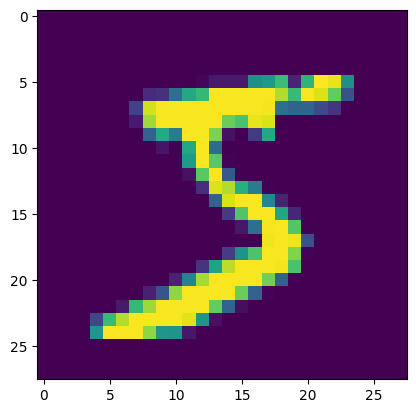

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Filtering out the Data for Faster Training on Smaller Dataset

In [6]:
only_zeros = X_train[y_train==0]

In [7]:
only_zeros.shape

(5923, 28, 28)

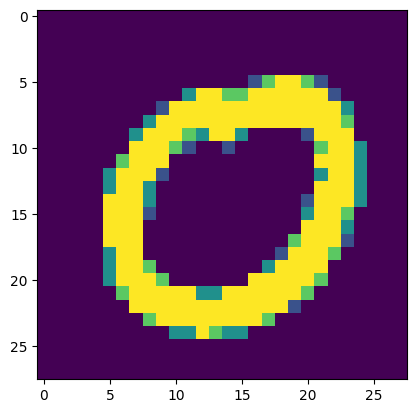

In [8]:
plt.imshow(only_zeros[950])

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 100

In [11]:
generator = Sequential()
generator.add(Dense(100, activation="relu", input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784, activation="sigmoid")) # 28*28 = 784
generator.add(Reshape([28,28]))

In [12]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
discriminator.add(Dense(1,activation="sigmoid"))

discriminator.compile(loss="binary_crossentropy", optimizer="adam")

In [13]:
GAN = Sequential([generator, discriminator])

In [14]:
discriminator.trainable = False

In [15]:
GAN.compile(loss="binary_crossentropy", optimizer="adam")

In [16]:
GAN.layers

In [17]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28)            143634    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 132951    
                                                                 
Total params: 276585 (1.06 MB)
Trainable params: 143634 (561.07 KB)
Non-trainable params: 132951 (519.34 KB)
_________________________________________________________________


In [18]:
GAN.layers[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 dense_2 (Dense)             (None, 784)               118384    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 143634 (561.07 KB)
Trainable params: 143634 (561.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
GAN.layers[1].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 150)               117750    
                                                                 
 dense_4 (Dense)             (None, 100)               15100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 132951 (519.34 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 132951 (519.34 KB)
_________________________________________________________________


### Setting up Training Batches

In [20]:
import tensorflow as tf

In [21]:
batch_size = 32

In [22]:
# my_data = X_train
my_data = only_zeros

In [23]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [24]:
type(dataset)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [25]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [26]:
epochs = 50

In [27]:
# Grab the seprate components
generator, discriminator = GAN.layers

# For every epcoh
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    # For every batch in the dataset
    for X_batch in dataset:
        i=i+1
        if i%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
        #####################################
        ## TRAINING THE DISCRIMINATOR ######
        ###################################

        # Create Noise
        noise = tf.random.normal(shape=[batch_size, codings_size])

        # Generate numbers based just on noise input
        gen_images = generator(noise)

        # Concatenate Generated Images against the Real Ones
        # TO use tf.concat, the data types must match!
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)

        # Targets set to zero for fake images and 1 for real images
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)

        # This gets rid of a Keras warning
        discriminator.trainable = True

        # Train the discriminator on this batch
        discriminator.train_on_batch(X_fake_vs_real, y1)


        #####################################
        ## TRAINING THE GENERATOR     ######
        ###################################

        # Create some noise
        noise = tf.random.normal(shape=[batch_size, codings_size])

        # We want discriminator to belive that fake images are real
        y2 = tf.constant([[1.]] * batch_size)

        # Avois a warning
        discriminator.trainable = False

        GAN.train_on_batch(noise, y2)

print("TRAINING COMPLETE")

Currently on Epoch 1
	Currently on batch number 100 of 185
Currently on Epoch 2
	Currently on batch number 100 of 185
Currently on Epoch 3
	Currently on batch number 100 of 185
Currently on Epoch 4
	Currently on batch number 100 of 185
Currently on Epoch 5
	Currently on batch number 100 of 185
Currently on Epoch 6
	Currently on batch number 100 of 185
Currently on Epoch 7
	Currently on batch number 100 of 185
Currently on Epoch 8
	Currently on batch number 100 of 185
Currently on Epoch 9
	Currently on batch number 100 of 185
Currently on Epoch 10
	Currently on batch number 100 of 185
Currently on Epoch 11
	Currently on batch number 100 of 185
Currently on Epoch 12
	Currently on batch number 100 of 185
Currently on Epoch 13
	Currently on batch number 100 of 185
Currently on Epoch 14
	Currently on batch number 100 of 185
Currently on Epoch 15
	Currently on batch number 100 of 185
Currently on Epoch 16
	Currently on batch number 100 of 185
Currently on Epoch 17
	Currently on batch number 

In [29]:
noise = tf.random.normal(shape=[10, codings_size])

In [30]:
noise.shape

TensorShape([10, 100])

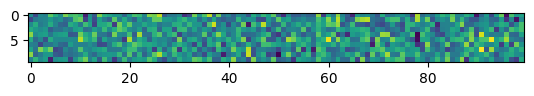

In [31]:
plt.imshow(noise)

In [32]:
image = generator(noise)

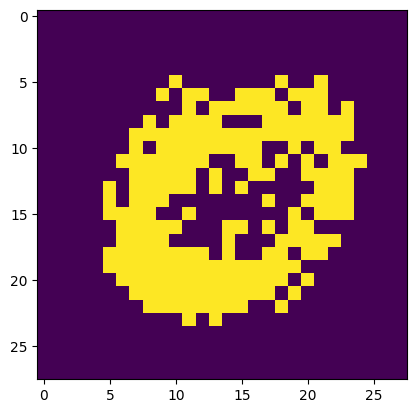

In [34]:
plt.imshow(image[2])

In [35]:
generator.save('GAN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
